In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
RANDOM_STATE = 42

df = pd.read_csv('/content/participant_wise_combined.csv') #present in data folder of github

In [7]:
print(df.shape)
df.head()

(100, 150)


,unnamed: 0,travel_time,subject_id,environment,id,trait_anx,gender,trait_anx_level,pre_saa,post_saa,...,SD_Ch20,SD_Ch21,SD_Ch22,SD_Ch23,SD_Ch24,SD_Ch25,SD_Ch26,F3_F4_theta,F3_Fz_theta,F4_Fz_theta
0,2,3,p2,e1,p2e1,40,F,low,67.926691,33.242639,...,2.205121,2.323949,2.448438,2.559333,2.681443,2.793338,2.942090,0.591511,0.751865,0.831779
1,3,3,p2,e2,p2e2,40,F,low,67.926691,33.242639,...,2.122518,2.236502,2.356954,2.457591,2.579662,2.689818,2.826633,0.655822,0.754214,0.869346
2,4,3,p3,e1,p3e1,45,M,high,2.617566,3.516061,...,1.968179,2.075824,2.174238,2.292225,2.371586,2.488037,2.620785,0.729207,0.850478,0.845125
3,5,3,p3,e2,p3e2,45,M,high,2.617566,3.516061,...,2.039863,2.154719,2.251570,2.377917,2.464296,2.582785,2.716161,0.666994,0.856318,0.810870
4,6,3,p4,e1,p4e1,58,M,high,3.652220,4.352831,...,1.761801,1.860421,1.987060,2.087508,2.143339,2.237350,2.375960,0.908584,0.965320,0.951152


In [10]:
X = df[[col for col in df.columns if "SD" in col]]

In [11]:
X.head()

,SD_Ch1,SD_Ch2,SD_Ch3,SD_Ch4,SD_Ch5,SD_Ch6,SD_Ch7,SD_Ch8,SD_Ch9,SD_Ch10,...,SD_Ch17,SD_Ch18,SD_Ch19,SD_Ch20,SD_Ch21,SD_Ch22,SD_Ch23,SD_Ch24,SD_Ch25,SD_Ch26
0,0.323597,0.308354,0.215686,0.307483,0.394006,0.503006,0.621678,0.721251,0.842718,0.936417,...,1.834497,1.992543,2.087983,2.205121,2.323949,2.448438,2.559333,2.681443,2.793338,2.942090
1,0.376256,0.384252,0.250080,0.310586,0.389720,0.502768,0.606264,0.710247,0.830844,0.908209,...,1.772280,1.920544,2.007662,2.122518,2.236502,2.356954,2.457591,2.579662,2.689818,2.826633
2,0.218196,0.214648,0.178334,0.259176,0.351659,0.458357,0.556491,0.663227,0.752357,0.856448,...,1.641840,1.734802,1.856358,1.968179,2.075824,2.174238,2.292225,2.371586,2.488037,2.620785
3,0.238958,0.236802,0.174437,0.273265,0.361496,0.477610,0.575873,0.689033,0.774537,0.883717,...,1.700327,1.809200,1.922771,2.039863,2.154719,2.251570,2.377917,2.464296,2.582785,2.716161
4,0.342786,0.365629,0.277954,0.381354,0.348079,0.455477,0.496199,0.592050,0.668741,0.777847,...,1.461568,1.617038,1.697929,1.761801,1.860421,1.987060,2.087508,2.143339,2.237350,2.375960


In [12]:
y = df["patch_switching_freq"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


In [13]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv = cross_val_score(model, X, y, scoring='r2', cv=5).mean()

    print(f"\n📌 {name}")
    print(f"R2 Score       : {r2:.3f}")
    print(f"RMSE           : {rmse:.3f}")
    print(f"5-Fold CV R2   : {cv:.3f}")

    return {"Model": name, "R2": r2, "RMSE": rmse, "CV_R2": cv}

In [16]:

results = []
results.append(evaluate_model(LinearRegression(), "Linear Regression"))
results.append(evaluate_model(RidgeCV(alphas=[0.1, 1.0, 10.0]), "Ridge Regression"))
results.append(evaluate_model(LassoCV(alphas=[0.001, 0.01, 0.1, 1.0]), "Lasso Regression"))
results.append(evaluate_model(RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE), "Random Forest"))
results.append(evaluate_model(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=RANDOM_STATE), "XGBoost"))
results.append(evaluate_model(MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=RANDOM_STATE), "MLP Regressor"))




📌 Linear Regression
R2 Score       : -0.246
RMSE           : 9.536
5-Fold CV R2   : -0.827

📌 Ridge Regression
R2 Score       : 0.086
RMSE           : 8.168
5-Fold CV R2   : 0.131


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.752049547086, tolerance: 0.26701204234375003
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648.9964817049198, tolerance: 0.280960904375
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477.7181779907677, tolerance: 0.24124326999999998
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWar


📌 Lasso Regression
R2 Score       : 0.089
RMSE           : 8.153
5-Fold CV R2   : 0.136

📌 Random Forest
R2 Score       : 0.094
RMSE           : 8.129
5-Fold CV R2   : 0.129

📌 XGBoost
R2 Score       : 0.012
RMSE           : 8.492
5-Fold CV R2   : -0.095

📌 MLP Regressor
R2 Score       : 0.105
RMSE           : 8.084
5-Fold CV R2   : 0.089


In [24]:
results_df = pd.DataFrame(results)
results_df.sort_values("CV_R2", ascending=False).reset_index(drop=True)




,Model,R2,RMSE,CV_R2
0,Lasso Regression,0.089003,8.153292,0.135614
1,Ridge Regression,0.085674,8.168172,0.131433
2,Random Forest,0.094422,8.129004,0.129208
3,MLP Regressor,0.104504,8.083628,0.089455
4,XGBoost,0.011825,8.491636,-0.094915
5,Linear Regression,-0.246215,9.536104,-0.826843


In [19]:
from sklearn.inspection import permutation_importance

# Fit your model again if not already done
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=RANDOM_STATE)
mlp.fit(X_train, y_train)

# Get permutation importance
perm_importance = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)

# Display in a sorted DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))  # Show top 10 important features

    Feature  Importance
25  SD_Ch26    0.016849
22  SD_Ch23    0.015956
21  SD_Ch22    0.013417
18  SD_Ch19    0.012364
24  SD_Ch25    0.011219
11  SD_Ch12    0.009436
15  SD_Ch16    0.008616
20  SD_Ch21    0.007938
16  SD_Ch17    0.007872
23  SD_Ch24    0.006354


<ipython-input-21-0dfe296fcd15>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


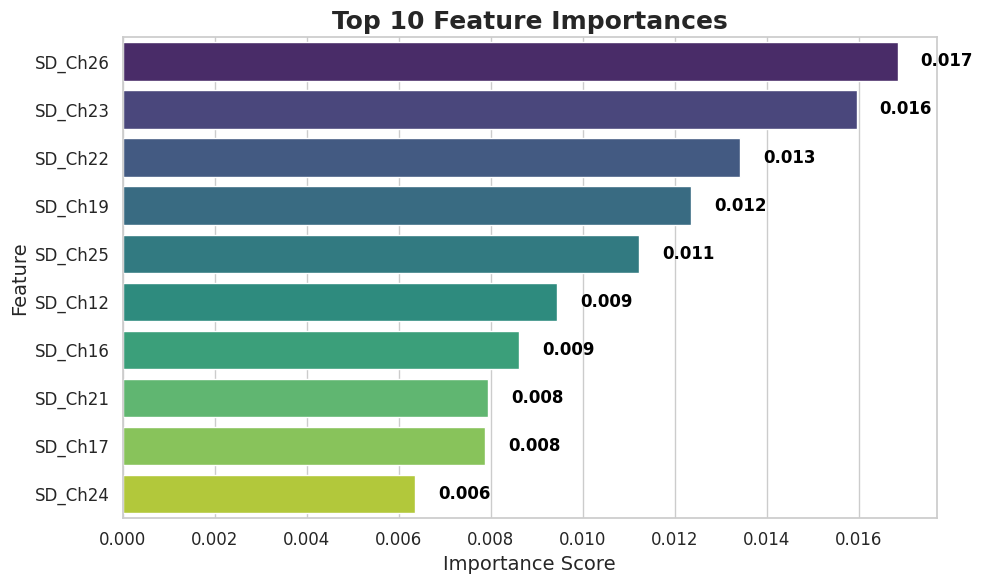

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `importance_df` is already sorted by 'Importance'
top_features = importance_df.head(10)

# Set up the figure
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Barplot
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_features,
    palette='viridis'
)

# Annotate bars with importance values
for i, (imp) in enumerate(top_features['Importance']):
    plt.text(imp + 0.0005, i, f"{imp:.3f}", color='black', fontweight='bold', va='center')

# Titles and labels
plt.title('Top 10 Feature Importances', fontsize=18, weight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Final touches
plt.tight_layout()
plt.show()

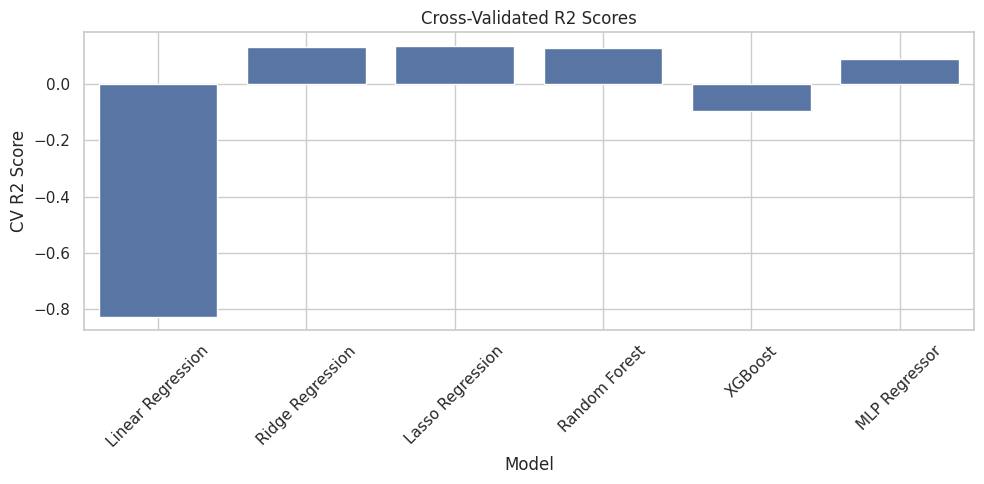

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="CV_R2", data=results_df)
plt.title("Cross-Validated R2 Scores")
plt.ylabel("CV R2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()